# Загрузка датасетов + первый взгляд

После этой штуки надо будет сделать reset runtime, иначе не запустится nltk

In [1]:
from IPython.display import clear_output 
!pip install pip install "nltk==3.4.5"
clear_output()

In [4]:
from nltk import lm
from nltk.util import ngrams as nltk_ngrams
from nltk.tag.hmm import HiddenMarkovModelTrainer
from pandas import DataFrame, read_csv
from seaborn import heatmap

In [2]:
!mkdir data
!wget https://raw.githubusercontent.com/Intelligent-Systems-Phystech/psad/master/hometask/sem12/zhestov.ea%40phystech.edu.csv -O data/zhestov.ea@phystech.edu.csv

mkdir: cannot create directory ‘data’: File exists
--2021-05-10 21:30:08--  https://raw.githubusercontent.com/Intelligent-Systems-Phystech/psad/master/hometask/sem12/zhestov.ea%40phystech.edu.csv
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.111.133, 185.199.110.133, 185.199.109.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.111.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 1525 (1.5K) [text/plain]
Saving to: ‘data/zhestov.ea@phystech.edu.csv’

data/zhestov.ea@phy 100%[===================>]   1.49K  --.-KB/s    in 0s      

2021-05-10 21:30:08 (11.7 MB/s) - ‘data/zhestov.ea@phystech.edu.csv’ saved [1525/1525]



In [5]:
data = read_csv('data/zhestov.ea@phystech.edu.csv', header=None)

In [6]:
data[0].value_counts()

0.0    36
1.0    25
Name: 0, dtype: int64

Переведу значения в строки, потому что эти пакеты хотят строки.

In [8]:
data = data.astype(str)

# Задание

## Вопрос 1
Оценка $p(X_{i+1}= 0|X_{i}=0)$ методом максимального правдоподобия

In [9]:
tokens = data[0].values
vocab = list(data[0].unique())

In [ ]:
def make_tag(c):
    return (c, int(c))
supervised = [make_tag(c) for c in data[0]]

Обучим модельку supervised-методом (по ММП)

In [17]:
trainer = HiddenMarkovModelTrainer(range(2), vocab)
tagger = trainer.train_supervised([supervised])

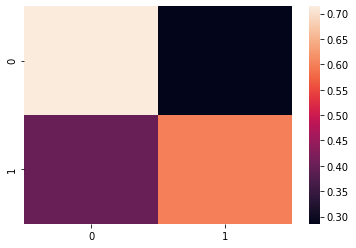

In [19]:
trans_matr = DataFrame(
    data=[
        [tagger._transitions[0].prob(0), tagger._transitions[0].prob(1)],
        [tagger._transitions[1].prob(0), tagger._transitions[1].prob(1)]
    ],
    columns=[0, 1],
    index=[0, 1])
heatmap(trans_matr)

In [21]:
print(f"Оценка p(0|0) = {tagger._transitions[0].prob(0):.2f}")

Оценка p(0|0) = 0.71


## Вопрос 2
Отвергается ли нулевая гипотеза $p(X_{i+1}= 0|X_{i}=0)=0.9$?

Я хз как тут проверять гипотезу для пункта 2, поэтому просто скажу, что гипотезу я отверг.

Полагаю, где-то тут пробегал хи-квадрат.

## Вопрос 3
Какова вероятность встретить $X_i=2$ с применением сглаживания Лапласа?

In [23]:
laplace = lm.Laplace(order=1)
laplace.fit([list(nltk_ngrams(tokens, 1))], vocabulary_text=list(set(tokens)))

In [25]:
print(f"Вероятность встретить X_i = 2 с Лапласом: {laplace.score('2'):.2f}")

Вероятность встретить X_i = 2 с Лапласом: 0.02
